# 神奇的 Pandas

利用Pandas，我們可以分析time series，Pandas有兩種主要的資料結構：
* Series：一條時間序列
* DataFrame：很多的時間序列

假如您會使用Series，相信離精通DataFrame也不遠了！

所以接下來我們以Series開始講起！

## 創建

Series 的創建可以參考[Pandas 文檔](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)
閱讀文檔是很重要的！課堂中不可能教您1000種Pandas的用法，甚至我也不可能全部被起來！
但藉由看文檔，我們可以即時找到需要的功能！

所以推薦大家多多練習喔！

以下我們先介紹常用的手法

In [5]:
# 身為碼農，我們要記得留意每一行註解喔！因為字裡行間可以有一些資訊，讓你少走冤枉路，更瞭解code在寫什麼！
# 什麼是註解呢？就是有 `#` 字後面接的字，都是註解喔！
# 不過通常註解都是英文，這邊為了方便閱讀，所以改成繁體中文XDD

# 首先呢，我們要把pandas給叫進來，等等才能使用
# 我們將pandas重新取名為pd（不取也是可以，但通常大家都會寫這行），因為這樣字比較少XDD，待會呼叫打的字比較少XD
import pandas as pd

# 接下來我們來創建一條序列，
# 創建序列要用`pd.Series`這個建構函式，其中的S為大寫代表我們要生成一個物件（建構子）！不然一般的function開頭都是小寫喔！
# `pd.Series` 中的第一個參數，我們要給它一個list，讓它把list轉換成 Series 喔！
s = pd.Series([1,2,3,4])

# 上面兩行等同於 s = pd.Series([1,2,3,4])


# 最後，我們在把s給print出來看看，s到底長什麼樣子
s
# 不用打print喔！因為jupyter 會自動印出每個block的最後一航程式

0    1
1    2
2    3
3    4
dtype: int64

跑出結果了！發現有兩列數字（columns）
* 第一條columns顯示0～3，為index
* 第二條就是每個index所對應到的值

你可能會想說「疑？感覺不是跟list很像？為何要多此一舉呢？」
接下來就不一樣囉！我們來做一條time series

In [6]:
date = pd.date_range('20180101', periods=6)
s = pd.Series([1,2,3,4,5,6], index=date)
s

2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    4
2018-01-05    5
2018-01-06    6
Freq: D, dtype: int64

每個時間都對應到一個值，這就是傳說中的time series了！

接下來，我們也可以直接創造全部都是0的time series喔！只要把list換成一個任意數字就可以了：

In [7]:
s = pd.Series(2, index=date)
s

2018-01-01    2
2018-01-02    2
2018-01-03    2
2018-01-04    2
2018-01-05    2
2018-01-06    2
Freq: D, dtype: int64

接下來，我們就來看看，如何把time series其中的值給找出來！

## 查找

In [8]:
# 建立一個 time series
date = pd.date_range('20180101', periods=6)
s = pd.Series([1,2,3,4,5,6], index=date)

# 查找
s.loc['20180104']

4

In [5]:
s.loc['20180102':'2018-01-04']

2018-01-02    2
2018-01-03    3
2018-01-04    4
Freq: D, dtype: int64

In [6]:
s.iloc[1]

2

In [7]:
s.iloc[1:4]

2018-01-02    2
2018-01-03    3
2018-01-04    4
Freq: D, dtype: int64

以上四種方式，大家搞清楚了嗎？

既然可以查找，那接下來，我們就來修改一下序列吧！

## 修改

In [11]:
l = [1,2,3,4,5,6]
date_index = pd.date_range('20180101', periods=6)

s = pd.Series(l, index=date_index)
s

2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    4
2018-01-05    5
2018-01-06    6
Freq: D, dtype: int64

In [9]:
print(s)
#s.max()
#s.min()
#s.mean()
s.std()

2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    4
2018-01-05    5
2018-01-06    6
Freq: D, dtype: int64


1.8708286933869707

In [10]:
print(s)
#s.cumsum()
#s.cumprod()

2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    4
2018-01-05    5
2018-01-06    6
Freq: D, dtype: int64


In [2]:
print(s)
s.rolling(2).sum()
#s.rolling(2).max()
#s.rolling(2).min()
#s.rolling(2).mean()
#s.rolling(2).std()

NameError: name 's' is not defined

In [12]:
print(s)
#s + 1
#s - 1
#s * 2
#s / 2
#s > 3
s < 3

2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    4
2018-01-05    5
2018-01-06    6
Freq: D, dtype: int64


2018-01-01     True
2018-01-02     True
2018-01-03    False
2018-01-04    False
2018-01-05    False
2018-01-06    False
Freq: D, dtype: bool

## 繪圖

<AxesSubplot:>

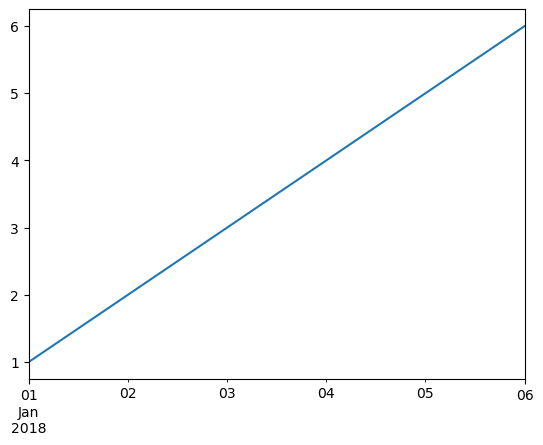

In [9]:
%matplotlib inline
s.plot()

## 綜合應用！

In [14]:
larger_than_3 = s > 3
s.loc[larger_than_3]

2018-01-04    4
2018-01-05    5
2018-01-06    6
Freq: D, dtype: int64

In [10]:
s.loc[larger_than_3] = s.loc[larger_than_3] + 1
s

NameError: name 'larger_than_3' is not defined

接下來你會看到一串可怕的運算，但別擔心，我們把它拆解開來看！
* 從頭開始讀
* 遇到會先算

In [16]:
(s.rolling(2).sum().cumsum() + 1).max()

41.0

In [19]:
# 在跑出它之前，先用手算算看
# 究竟會跑出多少呢？
s
((s + 2).cumprod() + 4).min()

7

### 習題

假設某小明體重從'2018-01-01'為60公斤，由於在'2018-01-03'吃太多，導致隔天起床發現變重5公斤，

請畫出小明體重的time series

In [ ]:
weight = pd.Series(60, index=pd.date_range('2018-01-01', periods=10))
weight.loc['2018-01-04':] += 5
weight
#weight = pd.Series(60, index=pd.date_range('2018-01-01', periods=6))
#weight.loc['2018-01-04':] += 5
#weight

# DataFrame 介紹！

DataFrame 基本上，可以想像是很多的time series，

我們剛剛所學，都是修改其中一條 Series，但我們藉由dataframe，就能以相同的function，直接修改多個Series喔！

In [20]:
s1 = pd.Series([1,2,3,4,5,6], index=date)
s2 = pd.Series([5,6,7,8,9,10], index=date)
s3 = pd.Series([11,12,5,7,8,2], index=date)

dictionary = {
    'c1': s1,
    'c2': s2,
    'c3': s3,
}

df = pd.DataFrame(dictionary)
df

,c1,c2,c3
2018-01-01,1,5,11
2018-01-02,2,6,12
2018-01-03,3,7,5
2018-01-04,4,8,7
2018-01-05,5,9,8
2018-01-06,6,10,2


<AxesSubplot:>

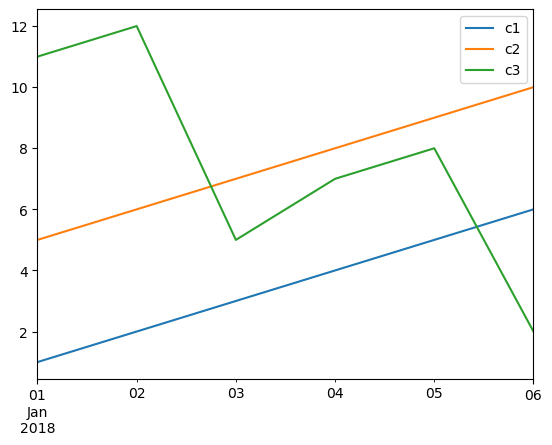

In [21]:
%matplotlib inline
df.plot()

## 選取

我們選取方式，幾乎跟剛剛一模一樣：

In [22]:
df.loc['2018-01-02']

c1     2
c2     6
c3    12
Name: 2018-01-02 00:00:00, dtype: int64

In [23]:
df.iloc[1]

c1     2
c2     6
c3    12
Name: 2018-01-02 00:00:00, dtype: int64

In [24]:
df.loc['2018-01-02':'2018-01-05', ['c1', 'c2']]

,c1,c2
2018-01-02,2,6
2018-01-03,3,7
2018-01-04,4,8
2018-01-05,5,9


In [25]:
df.iloc[1:4, [0, 1]]

,c1,c2
2018-01-02,2,6
2018-01-03,3,7
2018-01-04,4,8


In [ ]:
df.cumsum()

In [ ]:
df.cumprod()

In [ ]:
df.rolling(2).mean()

大家會發現，就是每條序列都執行一次原本series的功能而已！所以dataframe就這麼快速的教完囉！

學都學不完，我也有一堆function沒有用過呀！所以還是建議大家在寫code時，搭配doc（文檔）服用喔！

下面就是DataFrame才有的功能囉！

In [26]:
df['c3']

2018-01-01    11
2018-01-02    12
2018-01-03     5
2018-01-04     7
2018-01-05     8
2018-01-06     2
Freq: D, Name: c3, dtype: int64

In [ ]:
print(df)
df.cumsum(axis=1)